<a href="https://colab.research.google.com/github/maariasa/AnaliticaDatos/blob/master/Copia_de_Ejercicio_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
#from sklearn.metrics import mean_absolute_error
#from sklearn.pipeline import Pipeline

%matplotlib inline

#Importar archivos desde el Drive
#Acceso a google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Acceso a la base de datos housing.csv
file_id = '18k2MeSKGGHx-plzA0sjOHQAmU6Omv454'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('housing.csv')


#Acceso a funciones_housing
file_id2 = '19LJ2nCoxLRTRnNfmrnF5VOJMF0wgZXzj'
downloaded = drive.CreateFile({'id': file_id2})
downloaded.GetContentFile('funciones_housing.py') 



#Muestra datos de la base de datos
csv_path = 'housing.csv'
Xdata = pd.read_csv(csv_path)
Xdata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Preprocesamiento del dataset con PCA

In [0]:
from sklearn.model_selection import train_test_split
from funciones_housing import dummy_transformer, pre_exploratorio
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


In [3]:

Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "median_house_value"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)
ytrain = SimpleImputer(strategy="most_frequent").fit_transform(pd.DataFrame(ytrain))

Xdata = Xtrain
codificador = OrdinalEncoder()
Xdata['ocean_proximity'].value_counts()
Xdata['ocean_proximity'] = codificador.fit_transform(Xdata[['ocean_proximity']])
Xdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 13968 to 4057
Data columns (total 9 columns):
longitude             14448 non-null float64
latitude              14448 non-null float64
housing_median_age    14448 non-null float64
total_rooms           14448 non-null float64
total_bedrooms        14291 non-null float64
population            14448 non-null float64
households            14448 non-null float64
median_income         14448 non-null float64
ocean_proximity       14448 non-null float64
dtypes: float64(9)
memory usage: 1.1 MB


In [4]:

cod_b = OneHotEncoder()
imputer = SimpleImputer(strategy="most_frequent")
Xdata = pd.DataFrame(imputer.fit_transform(Xdata), columns=Xdata.columns,
                        index = list(Xdata.index.values))
Xdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 13968 to 4057
Data columns (total 9 columns):
longitude             14448 non-null float64
latitude              14448 non-null float64
housing_median_age    14448 non-null float64
total_rooms           14448 non-null float64
total_bedrooms        14448 non-null float64
population            14448 non-null float64
households            14448 non-null float64
median_income         14448 non-null float64
ocean_proximity       14448 non-null float64
dtypes: float64(9)
memory usage: 1.1 MB


In [5]:

#codificacion binaria rala (sparse) a datos completos (dense)
Xdb = cod_b.fit_transform(Xdata[['ocean_proximity']])
Xdata['ocean_binary'] = Xdb
for i in range(np.size(Xdb.toarray(),1)):
    Xdata['b_'+str(i+1)] = Xdb[:,i].toarray()

Xdata.drop(columns = ['ocean_binary'],inplace = True)
Xdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 13968 to 4057
Data columns (total 14 columns):
longitude             14448 non-null float64
latitude              14448 non-null float64
housing_median_age    14448 non-null float64
total_rooms           14448 non-null float64
total_bedrooms        14448 non-null float64
population            14448 non-null float64
households            14448 non-null float64
median_income         14448 non-null float64
ocean_proximity       14448 non-null float64
b_1                   14448 non-null float64
b_2                   14448 non-null float64
b_3                   14448 non-null float64
b_4                   14448 non-null float64
b_5                   14448 non-null float64
dtypes: float64(14)
memory usage: 1.7 MB


In [6]:

normalizar = StandardScaler()
red = PCA() #n_components son las dimensiones vectoriales

Xz = normalizar.fit_transform(Xdata)

Np = 5000
ind = np.random.randint(0,np.size(Xz,axis=0),Np)

Xred = red.fit_transform(Xz[ind,:])
Xred_data = pd.DataFrame(Xred)
Xred_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
0     5000 non-null float64
1     5000 non-null float64
2     5000 non-null float64
3     5000 non-null float64
4     5000 non-null float64
5     5000 non-null float64
6     5000 non-null float64
7     5000 non-null float64
8     5000 non-null float64
9     5000 non-null float64
10    5000 non-null float64
11    5000 non-null float64
12    5000 non-null float64
13    5000 non-null float64
dtypes: float64(14)
memory usage: 547.0 KB


'\ncluster = KMeans(n_clusters=5)\nlabels = cluster.fit_predict(Xred_data)\ncenters = cluster.cluster_centers_\n\n\nXred_data.plot(kind="scatter",x=0,y=1,\n               c = labels, label="cluster",\n              colormap = "jet", s = 10*abs(Xdata.iloc[:,1])/np.max(abs(Xdata.iloc[:,1])),\n              colorbar=True, sharex=False)\n#plt.scatter(x=centers[:,0],y=centers[:,1],marker="x",s=100,color="k",label="centers")\nplt.scatter(x=centers[:,0],y=centers[:,1],marker="x",s=100,color="k",label="centers")\nplt.legend()\n\n'

In [0]:



#Otros imports
from tempfile import mkdtemp
import os.path as path
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
#Xtrain = Xred_data
#Xtrain = Xdata
Xdata = Xred_data

k=5



##Inercia utilizando MiniBatchKmeans

In [9]:

Xdata_inerte = Xdata
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(Xdata_inerte)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [10]:
minibatch_kmeans.inertia_

#Resultado original: ~35721.58685916173; TERRIBLE!!! K=5
#K=5000 da una inercia de 64.9062256040161; Sigue siendo TERRIBLE!!!
#Resultado con el memmap aplicado y K=10: 25462.738582083774; horrible
#Resultado con el memmap aplicado, sin usar PCA para reducir dimesiones: 8703325451661.996 (!!!)
#Resultado con el memmap aplicado, con PCA + TSNE para reducir dimensiones: 20357568570.928936 lol

30326.49101255509

# Cálculo de la Silueta usando Silhouette_Score

In [11]:
from sklearn.metrics import silhouette_score
Xdata_silueta = Xdata
kmeans    = KMeans(n_clusters=k, n_init=1, random_state=42)
kmeans.fit(Xdata_silueta)
silhouette_score(Xdata_silueta, kmeans.labels_)
#Resultado original con K=5 ==> 0.3580708440246432; no muy bueno
#Resultado con K = 5000 ==> 0.3063999904888305; no muy bueno
#Resultado con K=5 sin reducir dimensiones con PCA ==> decente

0.3815564063444741

# Entrenamiento por medio de Kmeans

In [12]:
#Funciones adicionales
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
"""
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()
"""

'\nplt.figure(figsize=(8, 4))\nplot_decision_boundaries(kmeans, X)\n#save_fig("voronoi_plot")\nplt.show()\n'

In [13]:
Xdata_kmeans = Xdata
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(Xdata_kmeans)
kmeans_iter2.fit(Xdata_kmeans)
kmeans_iter3.fit(Xdata_kmeans)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

TypeError: ignored

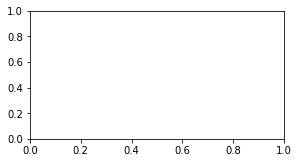

In [35]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(Xdata_kmeans)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, Xdata_kmeans, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, Xdata_kmeans, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, Xdata_kmeans, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, Xdata_kmeans, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, Xdata_kmeans, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

# DBSCAN

In [14]:
Xdata_DBSCAN = Xdata
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(Xdata_DBSCAN)
dbscan.labels_[:10]


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [15]:
len(dbscan.core_sample_indices_)

10

In [16]:
dbscan.core_sample_indices_

array([ 748, 1940, 1953, 2957, 3230, 3733, 4264, 4266, 4287, 4557])

In [17]:
dbscan.components_[:3]

array([[-5.21807537e-01, -1.97146133e+00,  2.50320033e-02,
         3.34321506e-01, -8.82643369e-01,  2.56645309e-01,
         2.32274667e-01, -1.71672221e-01,  1.12368555e-01,
         1.31047220e-01, -3.68982924e-02, -3.70728231e-03,
         6.55817598e-16, -1.20549818e-16],
       [-5.21807537e-01, -1.97146133e+00,  2.50320033e-02,
         3.34321506e-01, -8.82643369e-01,  2.56645309e-01,
         2.32274667e-01, -1.71672221e-01,  1.12368555e-01,
         1.31047220e-01, -3.68982924e-02, -3.70728231e-03,
         6.55817598e-16, -1.20549818e-16],
       [ 6.87500655e-01,  1.56168154e+00, -1.80963861e+00,
        -8.05828902e-01,  1.35348789e+00,  1.97696557e-01,
         5.89607769e-02, -1.18680010e-02, -4.55185908e-02,
         4.45692342e-02,  1.22753766e-01,  8.59656935e-03,
         6.03794739e-16, -6.41736573e-17]])

In [18]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(Xdata_DBSCAN)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

TypeError: ignored

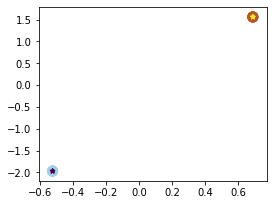

In [20]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, Xdata_DBSCAN, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, Xdata_DBSCAN, size=600, show_ylabels=False)

#save_fig("dbscan_plot")
plt.show()

# Spectral Clustering

In [23]:

Xdata_fantasmal = Xdata
sc1 = SpectralClustering(n_clusters=2, gamma=10, random_state=42)
sc1.fit(Xdata_fantasmal)

KeyboardInterrupt: ignored

In [0]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(Xdata_fantasmal)

In [0]:
np.percentile(sc1.affinity_matrix_, 95)

In [0]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

In [0]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, Xdata_fantasmal, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, Xdata_fantasmal, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

# Gráfica 2d con PCA

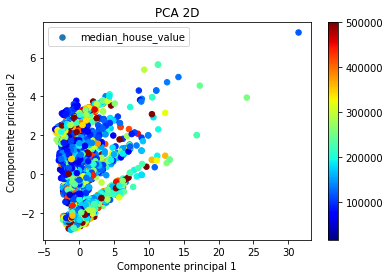

In [27]:

sval = 30
yc = ytrain[ind].reshape(-1)
Xdata.plot(kind="scatter",x=0,y=1,
               c = yc, s=sval, label = col_sal,
              colormap = "jet",colorbar=True, sharex=False)    
plt.title('PCA 2D')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()
    
